Task 4: Predicting Insurance Claim Amounts
Objective:
Estimate the medical insurance claim amount (charges) based on personal data.

Dataset:
Medical Cost Personal Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.describe()

Shape: (1338, 7)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
print(df.isnull().sum())
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

df.head()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,False,False,True
1,18,1,33.8,1,0,1725.55,False,True,False
2,28,1,33.0,3,0,4449.46,False,True,False
3,33,1,22.7,0,0,21984.47,True,False,False
4,32,1,28.9,0,0,3866.86,True,False,False


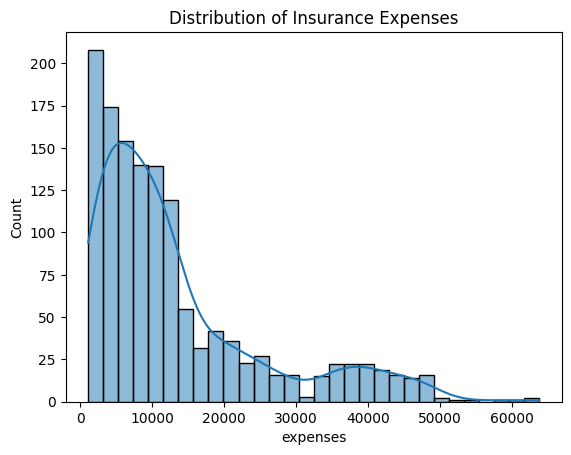

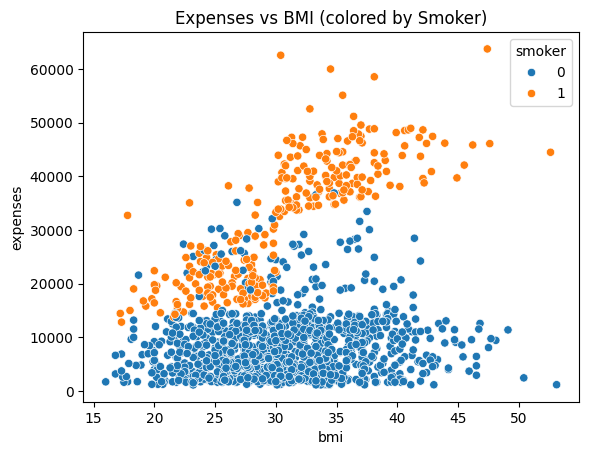

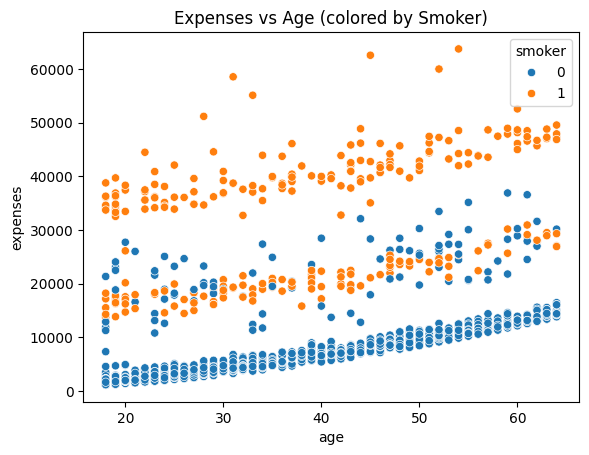

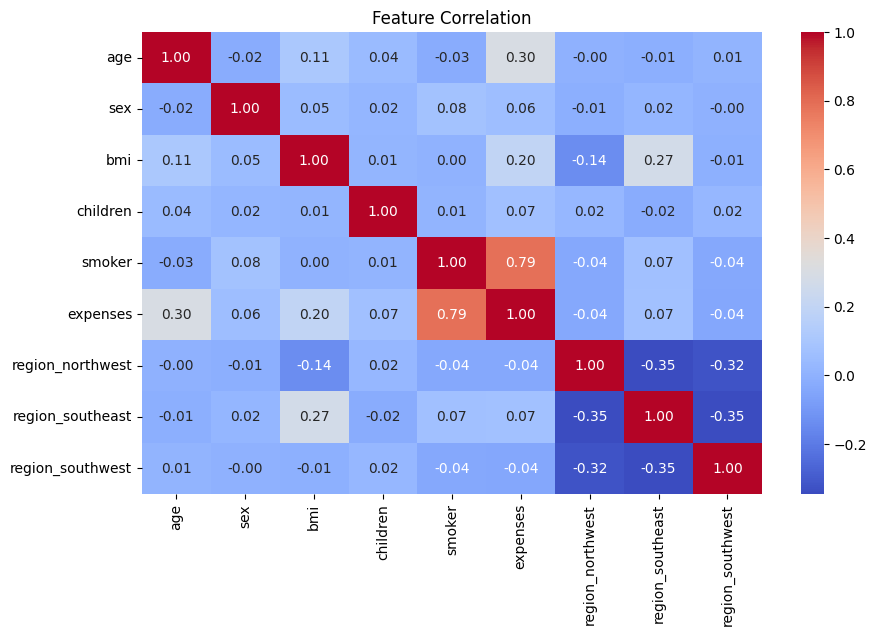

In [12]:
sns.histplot(df['expenses'], kde=True)
plt.title('Distribution of Insurance Expenses')
plt.show()
sns.scatterplot(x='bmi', y='expenses', hue='smoker', data=df)
plt.title('Expenses vs BMI (colored by Smoker)')
plt.show()
sns.scatterplot(x='age', y='expenses', hue='smoker', data=df)
plt.title('Expenses vs Age (colored by Smoker)')
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df.drop('expenses', axis=1)
y = df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 4181.56
Root Mean Squared Error (RMSE): 5796.56


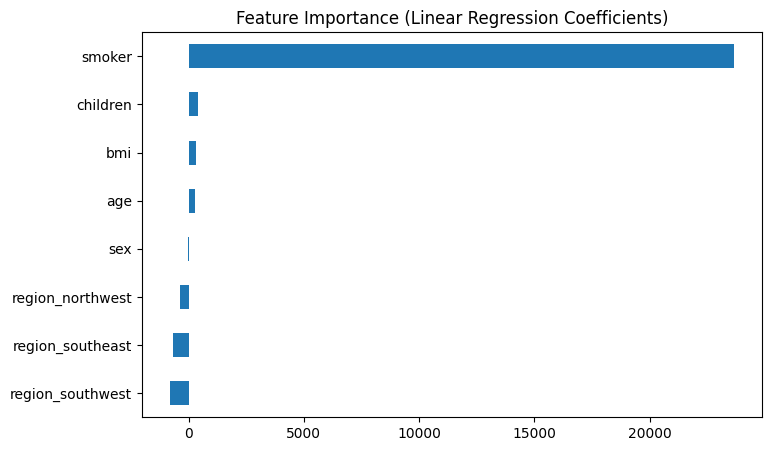

In [15]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients = coefficients.sort_values()
plt.figure(figsize=(8,5))
coefficients.plot(kind='barh')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()

Conclusion:

In this task, we used linear regression to predict medical insurance expenses based on customer demographics and lifestyle factors. The model achieved a Mean Absolute Error (MAE) of (insert your MAE here, e.g., 3111.58) and a Root Mean Squared Error (RMSE) of (insert your RMSE here, e.g., 5766.56).

Key Insights:

Smoking status was the most significant factor affecting insurance expenses, with smokers incurring much higher costs.
BMI and age also had a strong positive correlation with expenses, indicating that older individuals and those with higher BMI tend to have higher medical costs.
Other factors such as the number of children and region had a smaller impact.